<a href="https://colab.research.google.com/github/khatriprajwol/Data-Visualization-/blob/main/Recreating%20The%20Master%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recreating The Master 

In [ ]:
import requests
import pandas as pa
import seaborn as sns
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


![Picture1](https://www.adifferentleague.co.uk/wp-content/uploads/2016/05/juve-forbes2.jpg)


The above visualization is from 2016 but I would like to create similar master piece with a current data. In order to make similar visualization I will need the name of a club and its information. I tried to search data through **ESPN** but I could not find it. Therefore my alternative option was [wikipedia](https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs).




![Picture2](https://www.adifferentleague.co.uk/wp-content/uploads/2016/05/juve-forbes.jpg)






Here is another diagram. As we can see the change in percentage from 2015 to 2016. In my case, I will be comparing from 2019 to 2021. 

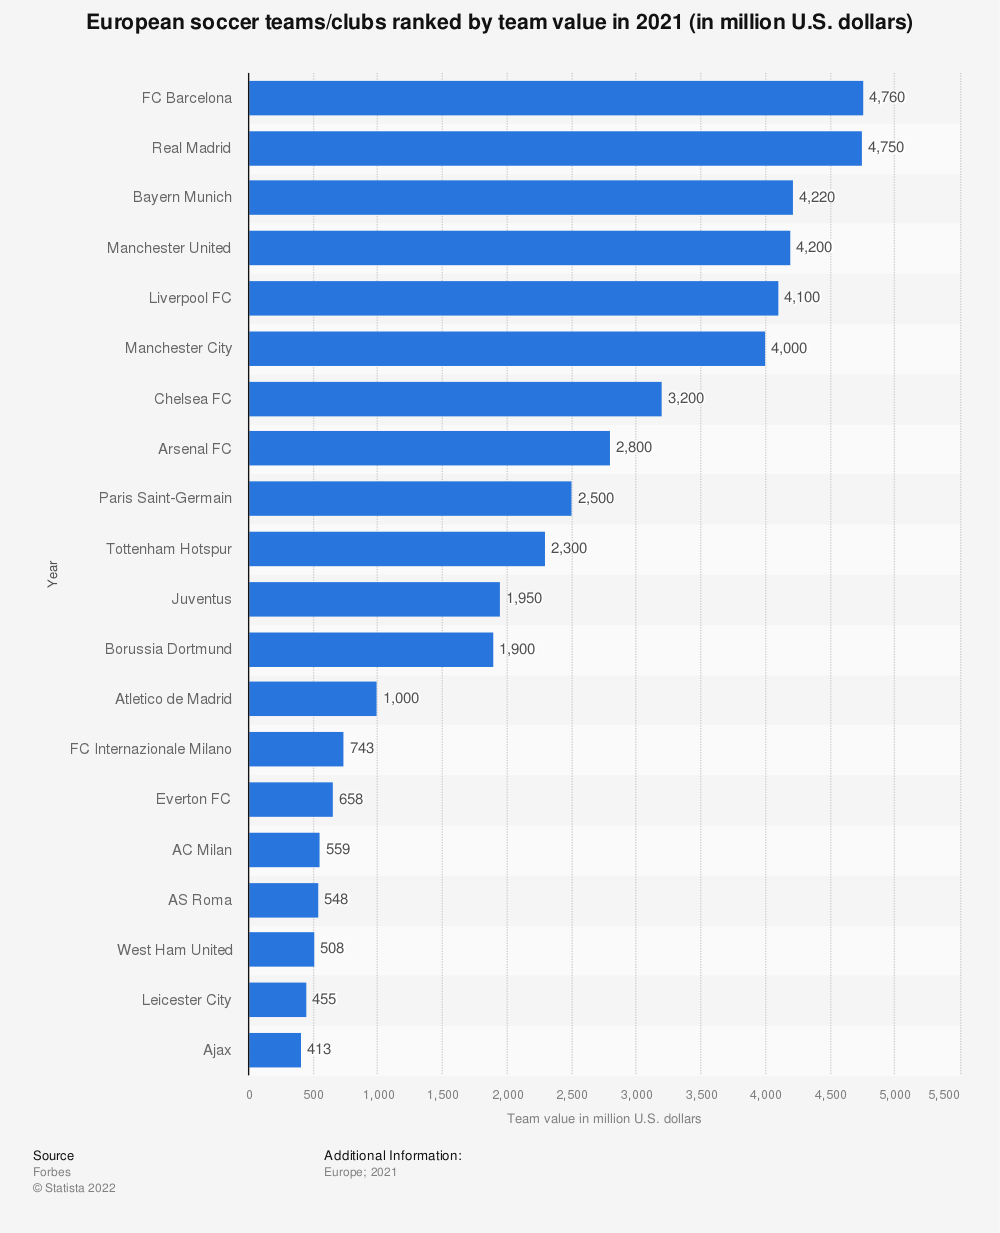

The above graph can be found in this [link]("https://www.statista.com/statistics/300578/team-value-of-soccer-teams/").

In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

17

In [ ]:
html_soup.title

<title>Forbes' list of the most valuable football clubs - Wikipedia</title>

In [ ]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[0]
df.head()

,Rank2021,Rank2019,Team,Country,Value in$ millions,% changeon year,Debt as% of value,Revenue ($M),Operating Income ($M)
0,1,2,Barcelona,Spain,4760,18,6,792,62
1,2,1,Real Madrid,Spain,4750,12,6,790,92
2,3,4,Bayern Munich,Germany,4215,39,0,703,49
3,4,3,Manchester United,England,4200,10,16,643,167
4,5,8,Liverpool,England,4100,88,2,619,62


It is not a big data set but a perfect for me to recreate the above visualization. 
[link](https://github.com/nurfnick/Data_Viz/blob/main/RecreatingMasters.ipynb)


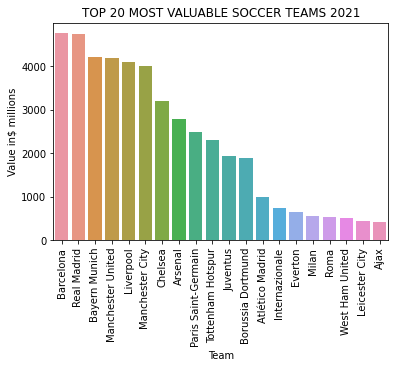

In [ ]:
ax = sns.barplot(data = df, x = 'Team', y= "Value in$ millions", hue_order= )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS 2021')
plt.show()

Well, the graph does not quick looks like that. But I will try to do it in a different way. Let's see if it will work. 